# Skin Cancer Classification

Link of dataset can be found <a href="https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000" >here</a>

Step to integrate dataset to the notebook : 
1. generate kaggle.json from your profile
1. download kaggle api command tools with `pip install kaggle`
1. move kaggle.json to ~/user/.kaggle
1. enter download command with `kaggle datasets download -d kmader/skin-cancer-mnist-ham10000`
1. move the zip file into `dataset` directory
1. extract the zip file
1. install virtual env with command `pip install virtualenv`
1. init virtual env with command `virtual venv -p python3`
1. activate your venv with command `source ./venv/bin/activate`
1. install all libraries with command `pip install -r requirements.txt`
1. if you need another libraries, please don't forget to add those into requirements.txt with command `ip freeze > requirements.txt`

In [11]:
import os
import splitfolders as split_folder
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
print(tf.__version__)

2.4.1


In [13]:
path_skin_cancer_csv = 'dataset/skin_cancer/HAM10000_metadata.csv'
df_skin_cancer_metadata = pd.read_csv(path_skin_cancer_csv)

In [14]:
df_skin_cancer_metadata.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
9282,HAM_0002768,ISIC_0028067,nv,consensus,60.0,female,abdomen
2935,HAM_0007364,ISIC_0029917,bcc,histo,80.0,male,back
9395,HAM_0005122,ISIC_0034265,nv,consensus,70.0,male,trunk
9188,HAM_0000000,ISIC_0025346,nv,histo,60.0,male,back
2169,HAM_0000856,ISIC_0029885,mel,histo,35.0,male,back


In [15]:
df_skin_cancer_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


# Exploratory Data Analysis

This section is used to find an insight in dataset. To make better understand about them, we also helped by matplotlib and seaborn to visualize data with a chart. 

Text(0.5, 1.0, 'Frequency Distribution of Classes')

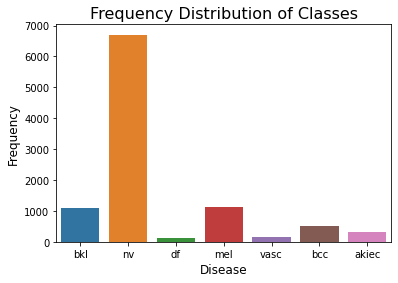

In [16]:
sns.countplot(x='dx', data=df_skin_cancer_metadata)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

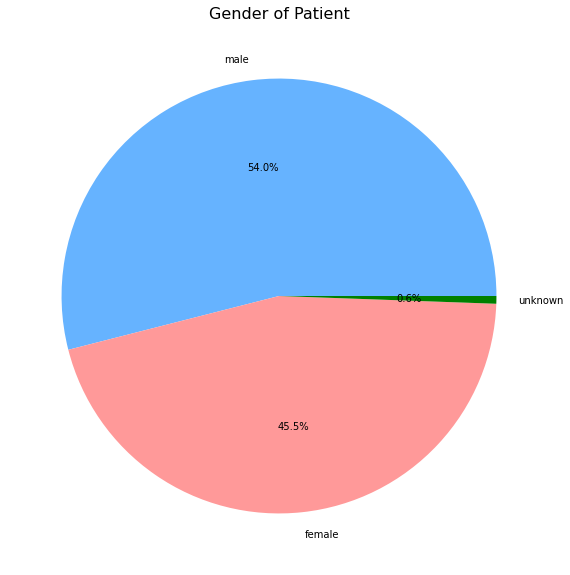

In [17]:
pie_chart_color = ['#66b3ff', '#ff9999', 'green']
bar, ax = plt.subplots(figsize=(10, 10))
plt.pie(df_skin_cancer_metadata['sex'].value_counts(),
        colors=pie_chart_color,
        labels=df_skin_cancer_metadata['sex'].value_counts().index,
        autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

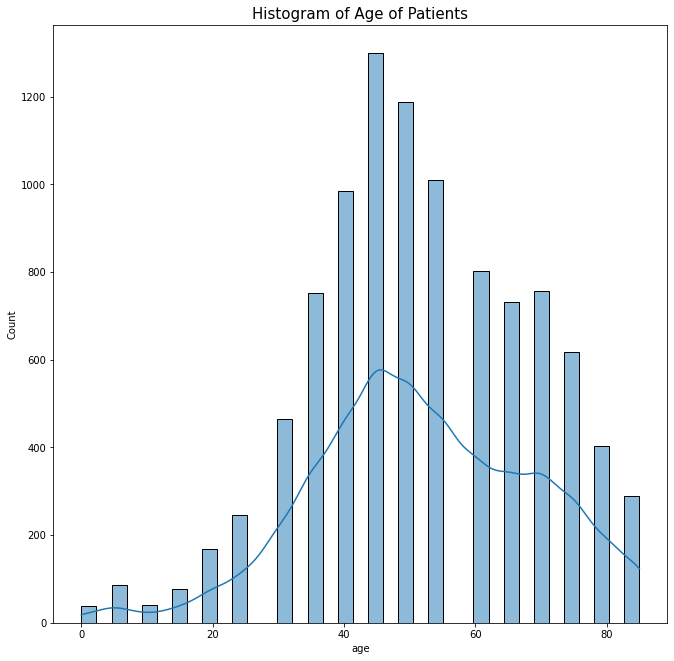

In [18]:
bar, ax = plt.subplots(figsize=(11, 11))
sns.histplot(df_skin_cancer_metadata['age'], kde=True)
plt.title('Histogram of Age of Patients', size=15)

# Prepare Dataset

This section is used to split dataset into train and test. Split method that used in this notebook is random over sampling which helped by sklearn library.

In [19]:
skin_cancer_28_size_path = 'dataset/skin_cancer/hmnist_28_28_RGB.csv'
df_skin_cancer_28_size = pd.read_csv(skin_cancer_28_size_path)
df_skin_cancer_28_size.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [20]:
y = df_skin_cancer_28_size['label']
x = df_skin_cancer_28_size.drop(columns=['label'])

In [21]:
type_of_cancer_classes = {
    1: ('bcc', ' basal cell carcinoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    3: ('df', 'dermatofibroma'),
    4: ('nv', ' melanocytic nevi'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    6: ('mel', 'melanoma'),
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
}

In [22]:
oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)

In [23]:
x = np.array(x).reshape(-1, 28, 28, 3)
print(x.shape)

(46935, 28, 28, 3)


In [24]:
x = (x - np.mean(x)) / np.std(x)
print(x.shape)

(46935, 28, 28, 3)


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(Y_train)

18033    1
38412    5
26590    2
6910     4
37704    5
        ..
43723    6
32511    3
5192     4
12172    0
33003    3
Name: label, Length: 37548, dtype: int64


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 3), padding='same'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,
                                     beta_1 = 0.9,
                                     beta_2 = 0.999,
                                     epsilon = 1e-8)

In [28]:
model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          3

In [30]:
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 64,
                    epochs = 5) 

Epoch 1/5
470/470 [==============================] - 23s 48ms/step - loss: 1.5980 - accuracy: 0.3346 - val_loss: 1.0026 - val_accuracy: 0.5911
Epoch 2/5
470/470 [==============================] - 22s 48ms/step - loss: 0.9354 - accuracy: 0.6348 - val_loss: 0.6441 - val_accuracy: 0.7559
Epoch 3/5
470/470 [==============================] - 23s 49ms/step - loss: 0.6003 - accuracy: 0.7742 - val_loss: 0.5098 - val_accuracy: 0.8017
Epoch 4/5
470/470 [==============================] - 23s 49ms/step - loss: 0.4144 - accuracy: 0.8451 - val_loss: 0.3607 - val_accuracy: 0.8586
Epoch 5/5
470/470 [==============================] - 23s 50ms/step - loss: 0.3001 - accuracy: 0.8895 - val_loss: 0.3281 - val_accuracy: 0.8751


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

Y_true = np.array(Y_test)

Y_pred = model.predict(X_test)
Y_pred = np.array(list(map(lambda x: np.argmax(x), Y_pred)))

In [32]:
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

classification_report_model = classification_report(Y_true, Y_pred, target_names=label_mapping.values())
print(classification_report_model)

              precision    recall  f1-score   support

          nv       0.92      0.99      0.96      1359
         mel       0.94      0.93      0.94      1318
         bkl       0.78      0.75      0.77      1262
         bcc       0.98      1.00      0.99      1351
       akiec       0.90      0.62      0.73      1374
        vasc       0.95      1.00      0.97      1358
          df       0.72      0.88      0.79      1365

    accuracy                           0.88      9387
   macro avg       0.89      0.88      0.88      9387
weighted avg       0.89      0.88      0.88      9387



In [36]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', 'pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

('nv', ' melanocytic nevi')


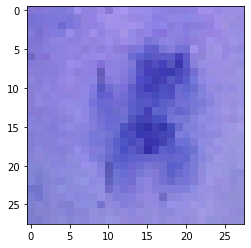

In [41]:
import cv2
path = 'dataset/skin_cancer/HAM10000_images_part_1/ISIC_0024307.jpg'
img = cv2.imread(path)
img = cv2.resize(img, (28, 28))
result = model.predict(img.reshape(1, 28, 28, 3))
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
class_name = classes[class_ind]
plt.imshow(img)
print(class_name)